In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\train.csv~\train.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
df.Product_Category_2.value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [7]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [9]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [10]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [11]:
df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [12]:
df.Marital_Status.unique()

array([0, 1], dtype=int64)

In [13]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [14]:
df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [15]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [16]:
#replace gender catagorical variable into numerical
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,8.0,16.0,7969


In [17]:
#here we are giving values according to situation (giving ranking eg:for age grp 0-17 the rank is 1)
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,1,7,16,C,4+,0,8,8.0,16.0,7969


In [18]:
df_city=pd.get_dummies(df['City_Category'],drop_first=1)
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [19]:
df=pd.concat([df,df_city],axis=1)
df.drop('City_Category',axis=1,inplace=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,1000001,P00248942,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,1000001,P00087842,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,1000001,P00085442,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,1000002,P00285442,1,7,16,4+,0,8,8.0,16.0,7969,0,1


In [20]:
#here '4+' value is a object its like a category so we have to replace it
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\Admin\AppData\Local\Temp/ipykernel_9868/1544275025.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [21]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  int32  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
 11  B                           550068 non-null  uint8  
 12  C                           550068 non-null  uint8  
dtypes: float64(2),

In [23]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  int32  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
 11  B                           550068 non-null  int32  
 12  C                           550068 non-null  int32  
dtypes: float64(2),

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

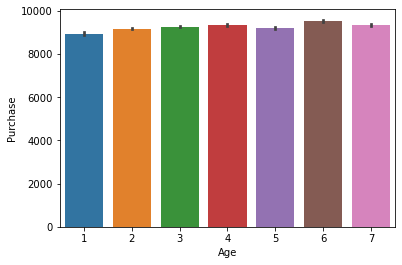

In [25]:
#Age vs purchase
sns.barplot('Age','Purchase',data=df)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

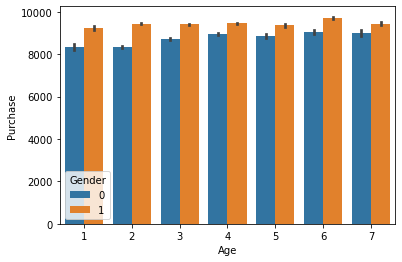

In [26]:
#with gender
sns.barplot('Age','Purchase',hue='Gender',data=df)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

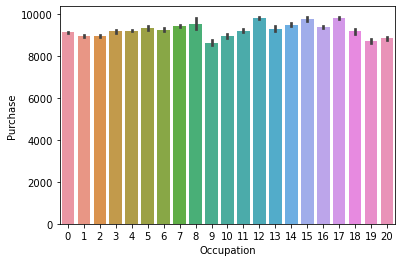

In [27]:
#occupation vs purchase
sns.barplot('Occupation','Purchase',data=df)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

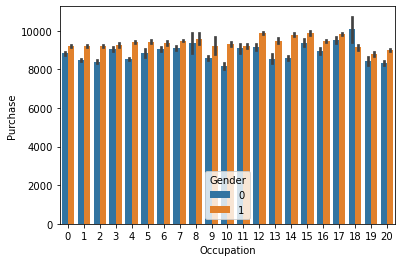

In [28]:
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

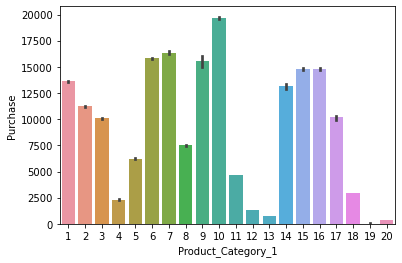

In [29]:
sns.barplot('Product_Category_1','Purchase',data=df)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

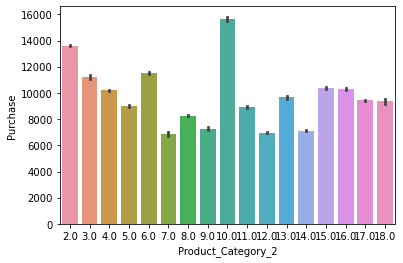

In [30]:
sns.barplot('Product_Category_2','Purchase',data=df)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

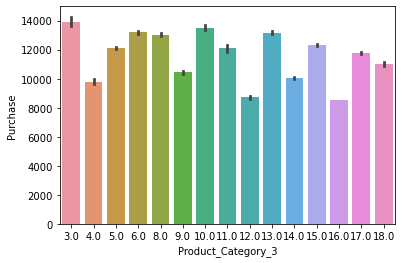

In [31]:
sns.barplot('Product_Category_3','Purchase',data=df)

In [32]:
df.describe(include='all')


,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
count,5.500680e+05,550068,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
unique,NaN,3631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,0.753105,3.496430,8.076707,1.858418,0.409653,5.404270,9.260768,14.989567,9263.968713,0.420263,0.311189
std,1.727592e+03,NaN,0.431205,1.353632,6.522660,1.289443,0.491770,3.936211,4.294093,2.739846,5023.065394,0.493601,0.462980
min,1.000001e+06,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,0.000000,0.000000
25%,1.001516e+06,NaN,1.000000,3.000000,2.000000,1.000000,0.000000,1.000000,8.000000,16.000000,5823.000000,0.000000,0.000000
50%,1.003077e+06,NaN,1.000000,3.000000,7.000000,2.000000,0.000000,5.000000,8.000000,16.000000,8047.000000,0.000000,0.000000
75%,1.004478e+06,NaN,1.000000,4.000000,14.000000,3.000000,1.000000,8.000000,14.000000,16.000000,12054.000000,1.000000,1.000000


# A basic observation is that:

Product P00265242 is the most popular product.

Most of the transactions were made by men.

Age group with most transactions was 26-35.

City Category with most transactions was B

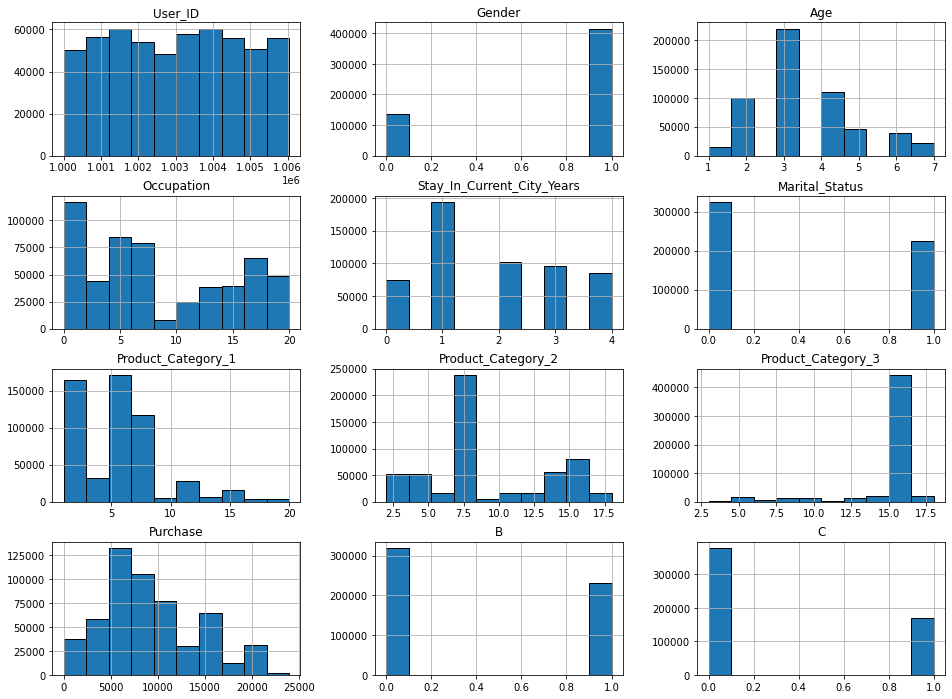

In [34]:
#general visuvalization
df.hist(edgecolor='black',figsize=(16,12));


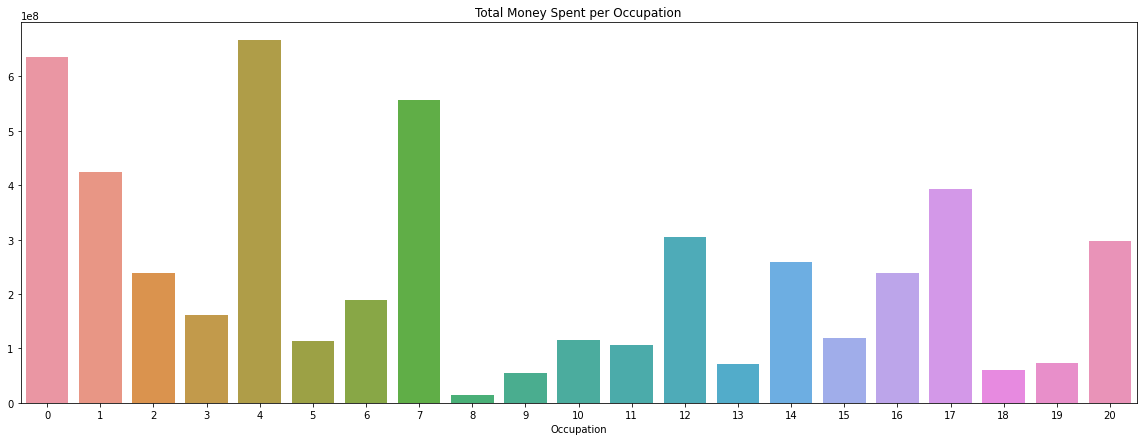

In [35]:
#Total Money Spent per Occupation
spent_by_occ = df.groupby(by='Occupation').sum()['Purchase']
plt.figure(figsize=(20, 7))

sns.barplot(x=spent_by_occ.index,y=spent_by_occ.values)
plt.title('Total Money Spent per Occupation')
plt.show()

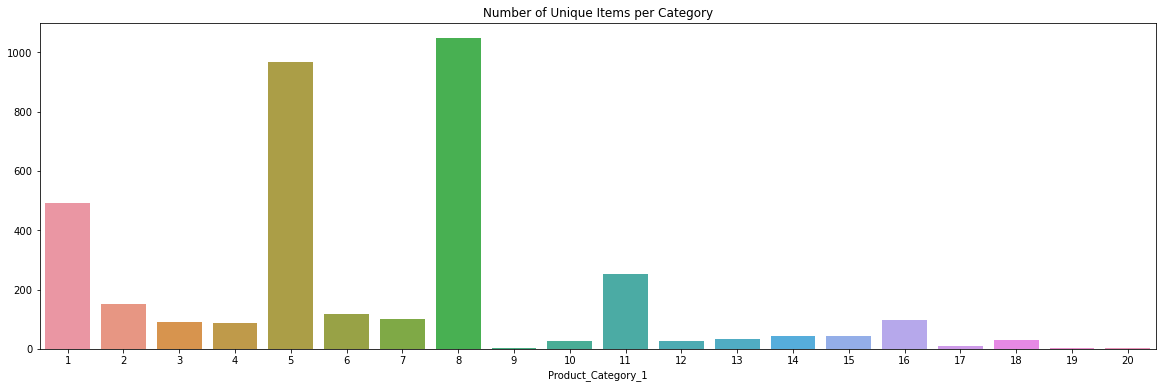

In [39]:
#Here we explore the products themselves,exploring the unique categories
plt.figure(figsize=(20,6))
prod_by_cat = df.groupby('Product_Category_1')['Product_ID'].nunique()

sns.barplot(x=prod_by_cat.index,y=prod_by_cat.values)
plt.title('Number of Unique Items per Category')
plt.show()

Category labels 1, 5, and 8 clearly have the most items within them. This could mean the store is known for that item, or that the category is a broad one.



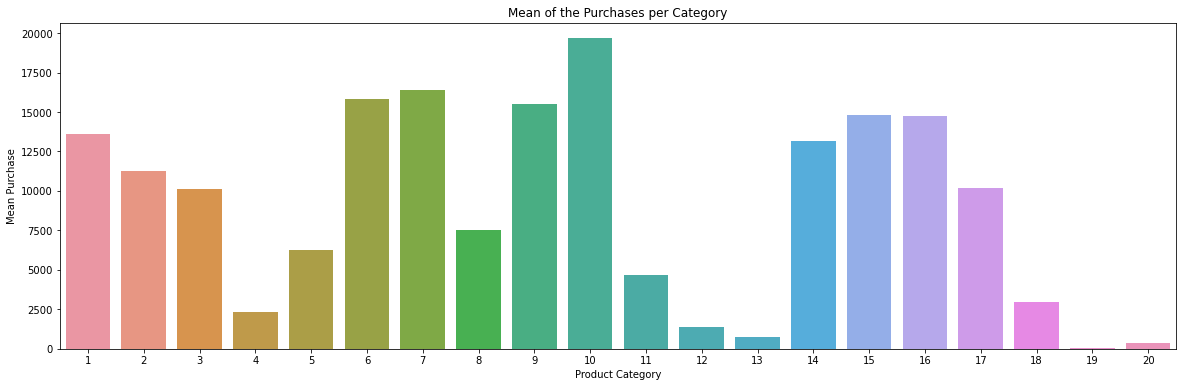

In [40]:
#visuvalizing Mean of the Purchases per Category group
category = []
mean_purchase = []


for i in df['Product_Category_1'].unique():
    category.append(i)
category.sort()

for e in category:
    mean_purchase.append(df[df['Product_Category_1']==e]['Purchase'].mean())

plt.figure(figsize=(20,6))

sns.barplot(x=category,y=mean_purchase)
plt.title('Mean of the Purchases per Category')
plt.xlabel('Product Category')
plt.ylabel('Mean Purchase')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


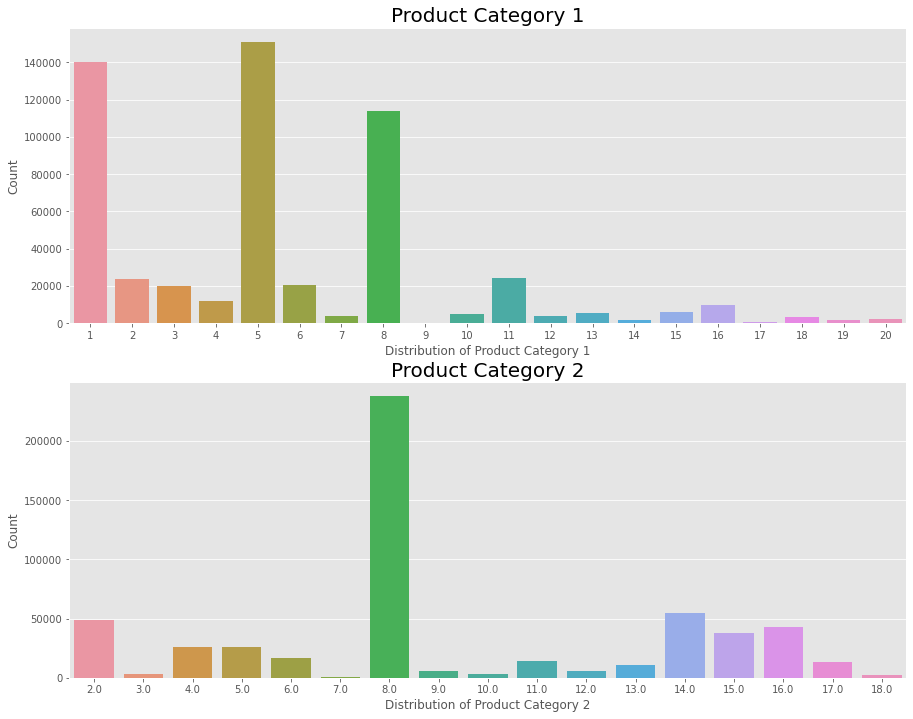

In [41]:
# visualizing the different product categories

plt.rcParams['figure.figsize'] = (15, 25)
plt.style.use('ggplot')

plt.subplot(4, 1, 1)
sns.countplot(df['Product_Category_1'])
plt.title('Product Category 1', fontsize = 20)
plt.xlabel('Distribution of Product Category 1')
plt.ylabel('Count')

plt.subplot(4, 1, 2)
sns.countplot(df['Product_Category_2'])
plt.title('Product Category 2', fontsize = 20)
plt.xlabel('Distribution of Product Category 2')
plt.ylabel('Count')


plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The mu 9263.968712959126 and Sigma 5023.060827959928 for the curve


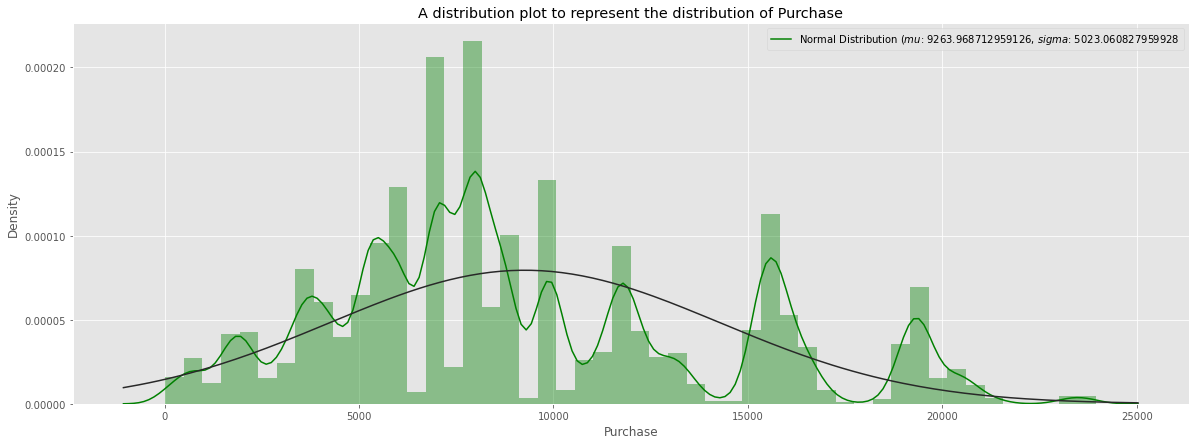

In [44]:
# plotting a distribution plot for the target variable
from scipy import stats
from scipy.stats import norm

plt.rcParams['figure.figsize'] = (20, 7)
sns.distplot(df['Purchase'], color = 'green', fit = norm)

# fitting the target variable to the normal curve 
mu, sigma = norm.fit(df['Purchase']) 
print("The mu {} and Sigma {} for the curve".format(mu, sigma))

plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu, sigma)], loc = 'best')
plt.show()

In [45]:
df = df.drop(['Product_ID','User_ID'],axis=1)

In [46]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,1,7,16,4,0,8,8.0,16.0,7969,0,1


In [47]:
x=df.drop('Purchase',axis=1)
y=df.Purchase

In [48]:
print(x.shape)
print(y.shape)

(550068, 10)
(550068,)


In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [51]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [52]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)
print(lm.fit(x_train, y_train))

LinearRegression()


In [53]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(normalize=False)

In [54]:
print('Intercept parameter:', lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)

Intercept parameter: 9265.28191666
                            Coefficient
Gender                       221.741121
Age                          167.470353
Occupation                    46.406818
Stay_In_Current_City_Years     8.533447
Marital_Status               -29.241559
Product_Category_1         -1592.165954
Product_Category_2           -12.871585
Product_Category_3          -419.480446
B                             77.823075
C                            313.856577


In [55]:
predictions = lm.predict(x_test)
print("Predicted purchases (in dollars) for new costumers:", predictions)

Predicted purchases (in dollars) for new costumers: [12493.95921378  9007.07625007  8682.25197825 ... 12053.2123461
 10602.52569829  9036.0050982 ]


In [64]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MAE: 3590.895821649037
MSE: 22095784.538123


In [60]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor

reg1 = RandomForestRegressor(max_depth=2, random_state=0).fit(x_train,y_train)

In [73]:
reg1.predict(x_test)

array([13604.71101515,  6418.81209598,  6418.81209598, ...,
        6418.81209598,  6418.81209598,  6418.81209598])

In [66]:
pred=reg1.predict(x_test)

In [71]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))

MAE: 3159.6293545850554
MSE: 17500579.565515734


In [72]:
reg2 = AdaBoostRegressor(random_state=0, n_estimators=100).fit(x_train,y_train)

In [74]:
reg2.predict(x_test)

array([12806.86407859,  6935.54695644,  6935.54695644, ...,
       10111.00549196,  6935.54695644,  6935.54695644])

In [75]:
pred1=reg2.predict(x_test)

In [76]:
print('MAE:', metrics.mean_absolute_error(y_test, pred1))
print('MSE:', metrics.mean_squared_error(y_test, pred1))

MAE: 3060.022762219621
MSE: 15057200.032293981


In [77]:
from xgboost import XGBRegressor

In [78]:
reg3 = XGBRegressor(random_state=0, n_estimators=100).fit(x_train,y_train)

In [81]:
reg3.predict(x_test)

array([13187.928 ,  6364.874 ,  6236.929 , ..., 10638.135 ,  2420.5134,
        6184.5864], dtype=float32)

In [82]:
pred2=reg3.predict(x_test)

In [83]:
print('MAE:', metrics.mean_absolute_error(y_test, pred2))
print('MSE:', metrics.mean_squared_error(y_test, pred2))

MAE: 2159.2709811981567
MSE: 8310041.174247546


In [85]:
lm.score(x_test, y_test)

0.1277869943358797

In [86]:
reg1.score(x_test, y_test)

0.3091789487100405

In [87]:
reg2.score(x_test, y_test)

0.40562935548209067

In [84]:
reg3.score(x_test, y_test)

0.6719679277611763